# LAB cleaning categorical

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [88]:
def snake_str(x: str):
    x = x.replace(' ', '_')
    return x.lower()


customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.columns = list(map(snake_str, customer_df.columns)) 
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [89]:
# num/cat split
cats = customer_df.select_dtypes(include=object)

# from prev lab:
discretes = customer_df[['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']]

cats = pd.concat([cats, discretes], axis=1)

In [90]:
cats.isna().sum()

customer                         0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [91]:
# customer only uniques, so dropping
cats = cats.drop(['customer'], axis=1)
cats

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,18,89,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,14,28,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,9,37,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,34,3,0,3


In [92]:
# all make sense as categorical?  
"""yes"""
cats.dtypes

state                            object
response                         object
coverage                         object
education                        object
employmentstatus                 object
gender                           object
location_code                    object
marital_status                   object
policy_type                      object
policy                           object
renew_offer_type                 object
sales_channel                    object
vehicle_class                    object
vehicle_size                     object
months_since_last_claim           int64
months_since_policy_inception     int64
number_of_open_complaints         int64
number_of_policies                int64
dtype: object

In [93]:
# any column contain alpha and numeric data?
"""yes and its ok, because just names"""

'yes and its ok, because just names'

In [94]:
# compare policy_type and policy
"""type are groups of policy, so policy is the important col"""
cats[['policy_type', 'policy']].value_counts()

policy_type     policy      
Personal Auto   Personal L3     3426
                Personal L2     2122
                Personal L1     1240
Corporate Auto  Corporate L3    1014
                Corporate L2     595
                Corporate L1     359
Special Auto    Special L2       164
                Special L3       148
                Special L1        66
dtype: int64

In [95]:
cats['policy'] = cats['policy'].apply(lambda x: str.split(x, ' ')[1])
cats

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize,18,89,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize,14,28,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize,9,37,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,34,3,0,3


In [96]:
# check num of unique values in each col
cats.nunique()

state                              5
response                           2
coverage                           3
education                          5
employmentstatus                   5
gender                             2
location_code                      3
marital_status                     3
policy_type                        3
policy                             3
renew_offer_type                   4
sales_channel                      4
vehicle_class                      6
vehicle_size                       3
months_since_last_claim           36
months_since_policy_inception    100
number_of_open_complaints          6
number_of_policies                 9
dtype: int64

In [97]:
# options to ease encoding:

# bin "months_since_last_claim" + "months_since_policy_inception" 
# combine master + doctor
# combine luxury SUV + luxury car
# (combine medical, disabled, retired)

# LAB feature extraction

In [98]:
cats.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1


In [99]:
def plot_cats(df: pd.DataFrame):
    for col in df.columns:
        plt.figure(figsize=(10,2))
        sns.countplot(x=df[col])
        plt.show()

In [100]:
cats['education'] = cats['education'].apply(lambda x: 'Higher Degree' if x == 'Doctor' or x == 'Master' else x)
cats['vehicle_class'] = cats['vehicle_class'].apply(lambda x: 'Luxury Car' if x == 'Luxury SUV' or x == 'Luxury Car' else x)
cats['months_claim'] = pd.cut(cats['months_since_last_claim'], 10)
cats['months_inception'] = pd.cut(cats['months_since_policy_inception'], 10)

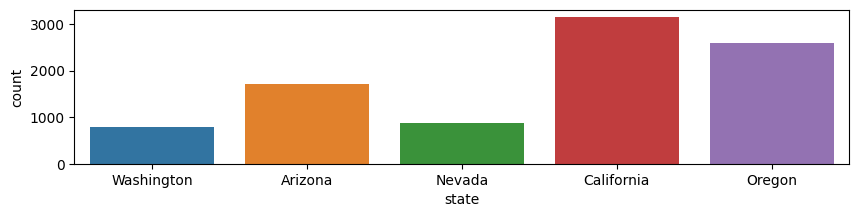

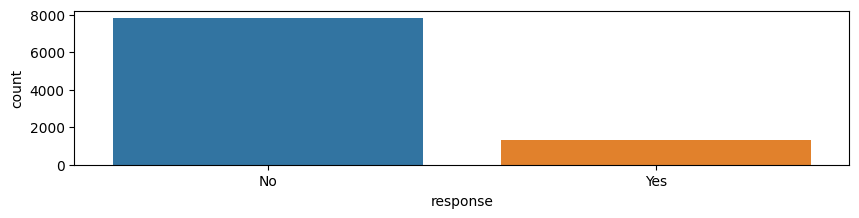

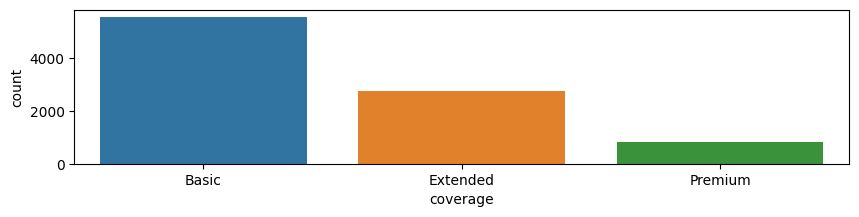

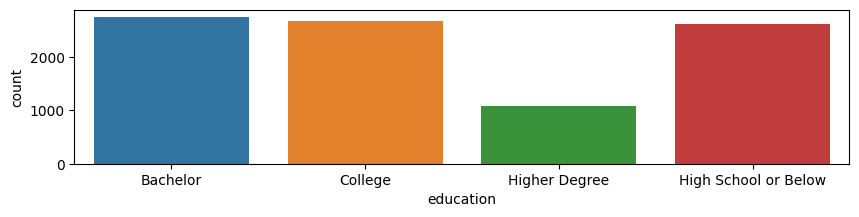

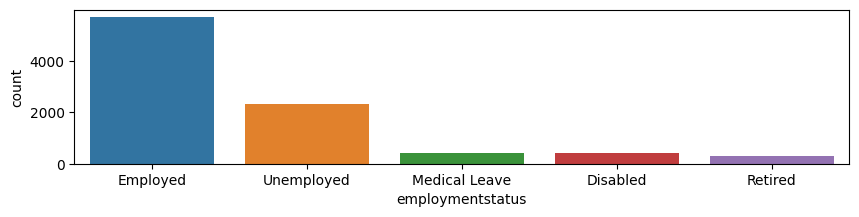

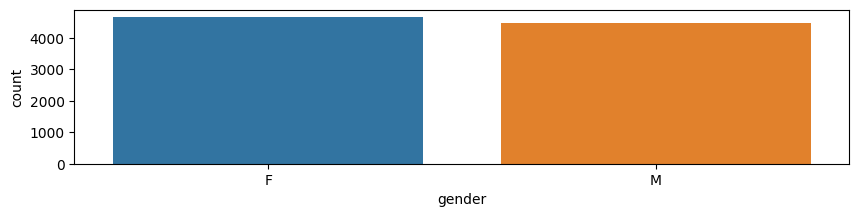

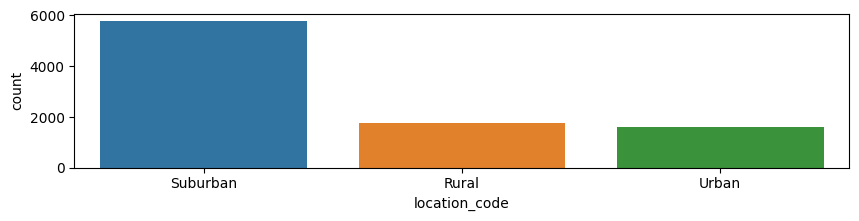

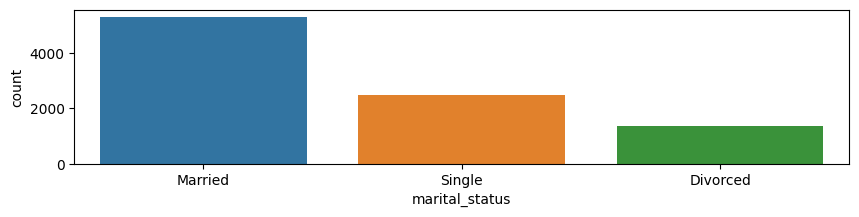

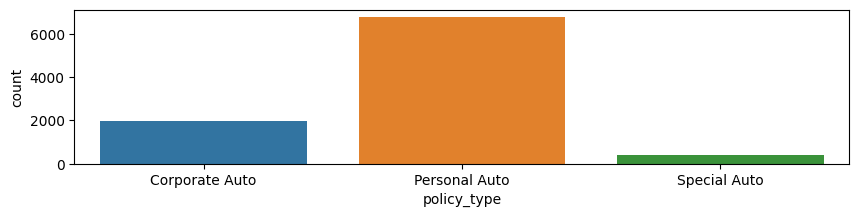

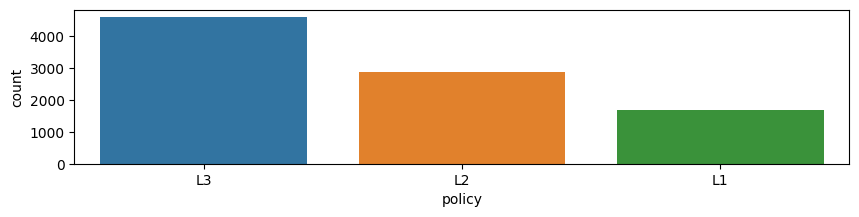

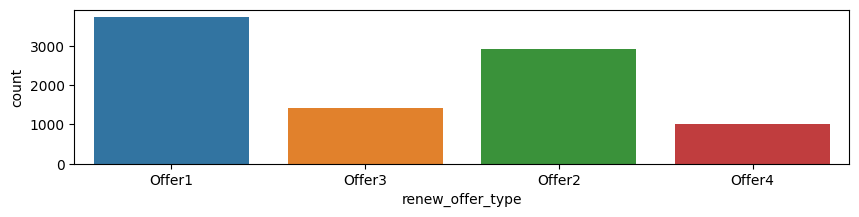

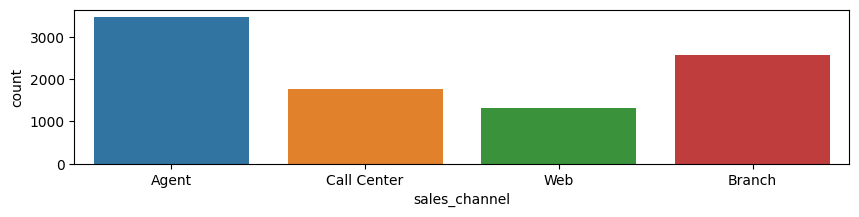

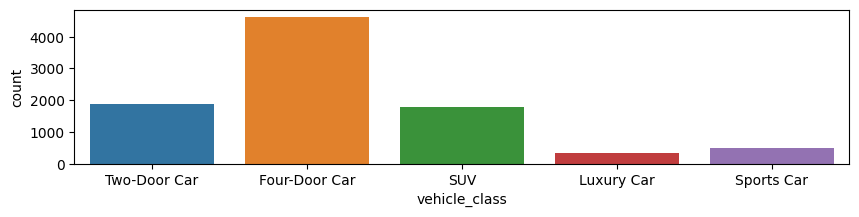

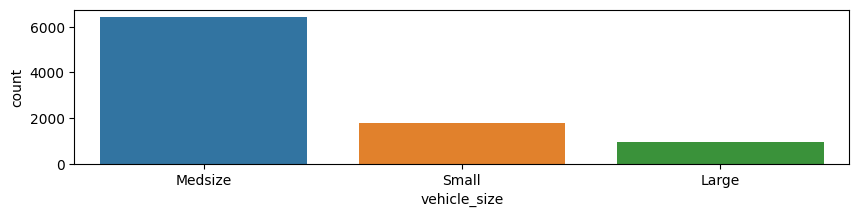

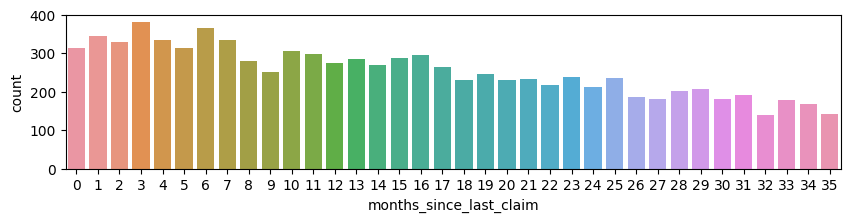

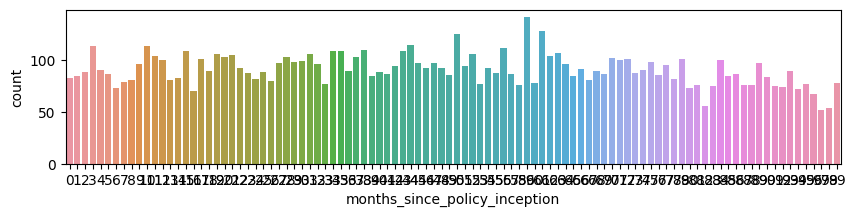

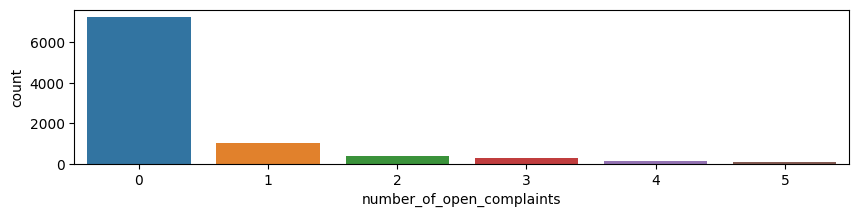

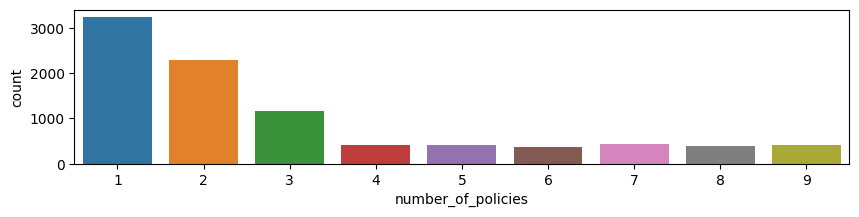

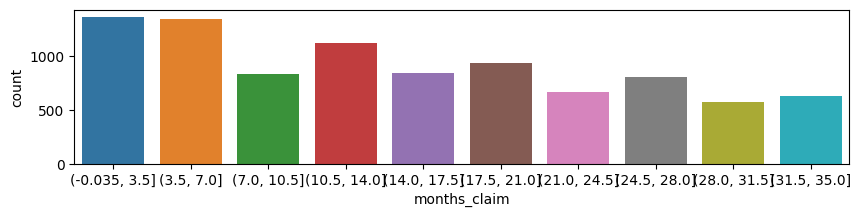

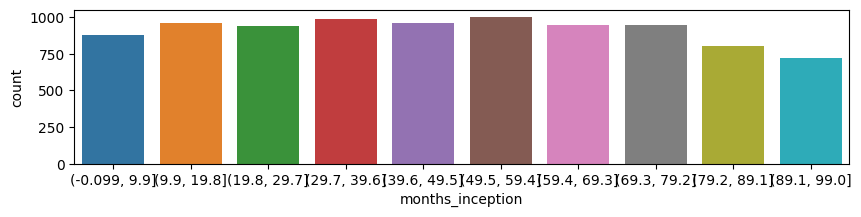

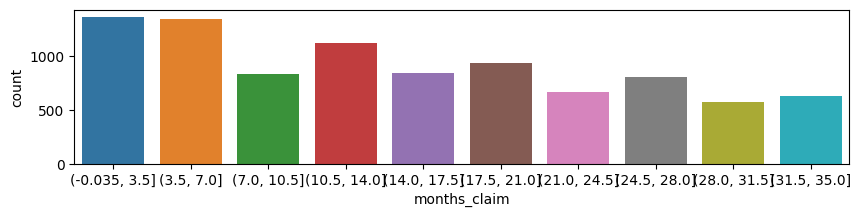

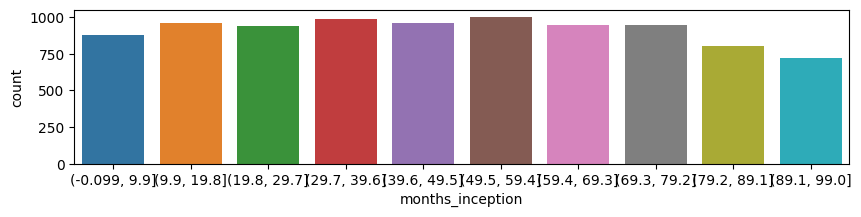

In [101]:
# plot cats
plot_cats(cats)

<AxesSubplot: xlabel='effective_to_date'>

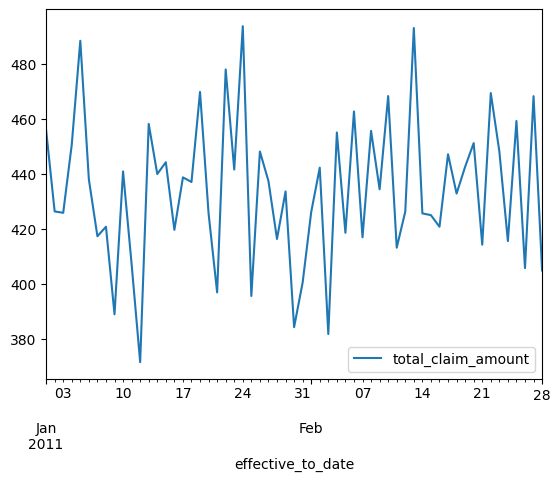

In [106]:
claim_avg = customer_df.groupby(['effective_to_date'])[['total_claim_amount']].agg('mean')
claim_avg.plot()